In [1]:
import numpy as np # loads simple numeric analysis package called "numpy", lets us invoke it with abbrev. "np"
import pandas as pd # loads sophisticated data analysis package called "pandas", lets us invoke it with abbrev. "pd"
import matplotlib.pyplot as plt # same but for a library of graphing inspired heavily by MATLAB
%matplotlib inline
    # Tells Python to plot graphs in-line. 
import seaborn as sns # same but for the Seaborn, which is a a sleeker graphing package
from IPython.display import Latex # LaTeX is a pretty useful tool to have for rendering mathematical symbols
from mpl_toolkits import mplot3d # This allows for plotting in R3.

In [2]:
GSS = pd.read_stata("~/desktop/Python/data/gss2018python.dta")
# There are several ways to get these pesky incorrect data-types corrected. Here's one simple one, 
# given by page 176 of VanderPlas (many methods you'll find on Google are more complex).
GSS['educ'] = GSS['educ'].dropna() # We need to drop missing values first
GSS['educ'] = GSS['educ'].astype(float) # Then convert to a float
GSS['educ'].describe()
GSS['paeduc'] = GSS['paeduc'].dropna() 
GSS['paeduc'] = GSS['paeduc'].astype(float)
GSS = GSS.dropna(subset=['educ', 'paeduc'])
GSS.describe()

/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,educ,formwt,id,oversamp,paeduc,version,year
count,1687.000000,1687.0,1687.000000,1687.0,1687.000000,1687.000000,1687.0
mean,14.123296,1.0,1174.059277,1.0,11.883225,2.005928,2018.0
std,2.917444,0.0,680.731570,0.0,4.147774,0.818651,0.0
min,0.000000,1.0,1.000000,1.0,0.000000,1.000000,2018.0
25%,12.000000,1.0,568.500000,1.0,10.000000,1.000000,2018.0
50%,14.000000,1.0,1171.000000,1.0,12.000000,2.000000,2018.0
75%,16.000000,1.0,1771.500000,1.0,14.000000,3.000000,2018.0
max,20.000000,1.0,2348.000000,1.0,20.000000,3.000000,2018.0


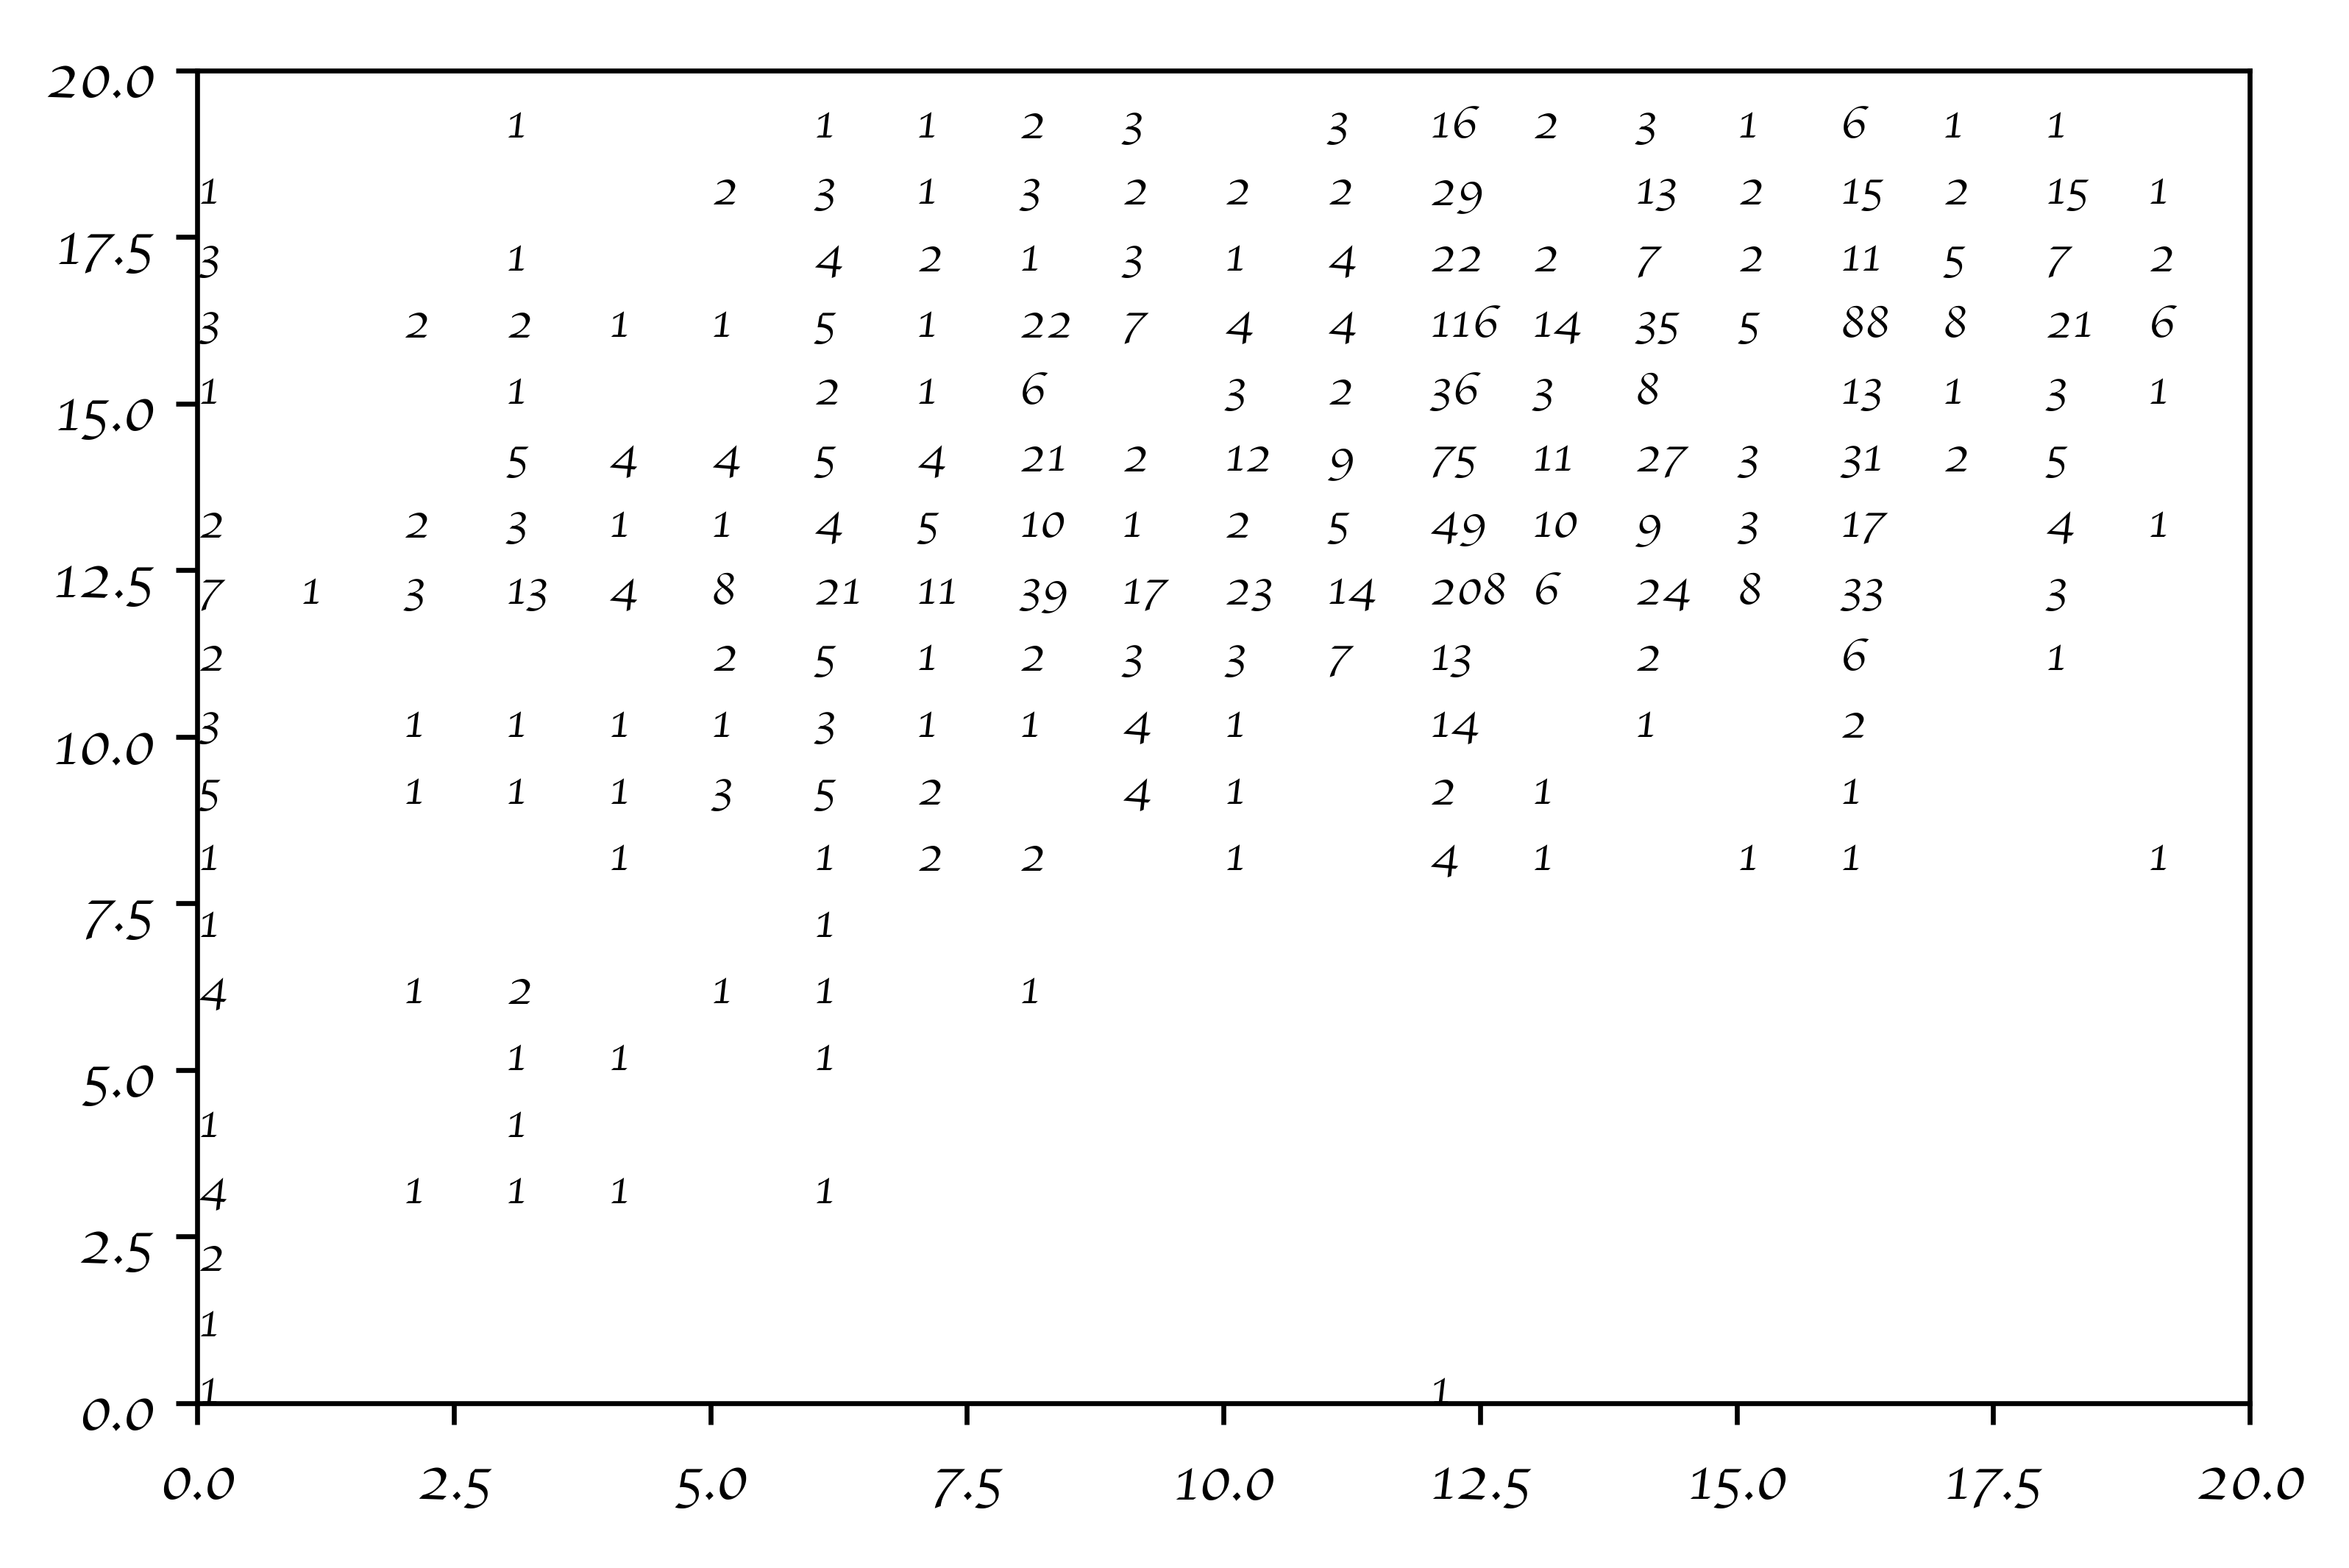

In [4]:
#GSS example
#but omitting zeros
abscissa = GSS["paeduc"]
ordinate = GSS["educ"]
xmin = int(np.min(abscissa))
xmax = int(np.max(abscissa))
ymin = int(np.min(ordinate))
ymax = int(np.max(ordinate))        

plt.rcParams["font.family"] = "cursive"
fig, ax = plt.subplots(dpi=600)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
for i in range (xmin, xmax):
    for j in range(ymin, ymax):
        dens = sum((GSS["paeduc"] == i) & (GSS["educ"] == j))
        if dens > 0:
            dens = str(sum((GSS["paeduc"] == i) & (GSS["educ"] == j)))
            ax.annotate(dens, xy =(i, j), fontsize=8)